PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

<GRUPO 7>

#INTRODUCCIÓN

En este trabajo se va a proceder a realizar un proyecto de creación de una red neuronal que nos permita solucionar un problema de regresión.

Para tomar el tema sobre el cual va a tratar este proyecto se ha decidido buscar un tema que pueda ser útil en nuestro día a día, por eso hemos decidido que una buena opción es realizar predicciones de temperatura en un lugar concreto.

A continuación se procederá a realizar la resolución de este proyecto: 

Se importa keras

In [1]:
import keras
keras.__version__

'2.9.0'

# Descarga y tratado de datos
Para comenzar el desarrollo del proyecto es necesario cargar la base de datos que se va a utilizar en este. La base de datos empleada en este proyecto ha sido extraída de kaggle y consta de los siguientes datos:

Se trata de una base de datos con un registro de 96453 registros de los cuales se han cogido 12 características que son las siguientes:
- **Formatted date**: Fecha
- **Summary**: Resumen del clima de ese momento
- **Precip Type**: Tipo de precipitación
- **Temperature**: Temperatura en grados centígrados
- **Apparent Temperature**: Sensación térmica en grados centígrados
- **Humidity**: Humedad
- **Wind speed**: Velocidad del viento
- **Wind Bearing**: Dirección del viento
- **Visibility**: Rango de visibilidad
- **Loud cover**: Nubosidad
- **Pressure**: Presión atmosférica
- **Daily summary**: Resumen diario

Se va a mostrar una tabla como ejemplo de muestra de estos datos:



In [2]:
import pandas as pd
datos=pd.read_csv('weatherHistory.csv',encoding='latin-1')
datos.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Se comprueba que se han importado correctamente todos los datos

In [3]:
datos.shape

(96453, 12)

Se comprueba el tipo de dato que se da en cada una de las características

In [4]:
datos.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Se procede a comprobar si existen datos que tenga valores nulos, con el fin de saber si se han de eliminar alguno de estos registros para el correcto funcionamiento de la red.

Además se comprueba, si existen columnas con un valor único que serían irrelevantes para el desarrollo de la red

In [5]:
for c in datos.columns:
    print("Missing values [{0}]:".format(c), datos[c].isna().sum())
print() 
for c in datos.columns:
    print("Unique values [{0}]:".format(c), datos[c].unique().size)

Missing values [Formatted Date]: 0
Missing values [Summary]: 0
Missing values [Precip Type]: 517
Missing values [Temperature (C)]: 0
Missing values [Apparent Temperature (C)]: 0
Missing values [Humidity]: 0
Missing values [Wind Speed (km/h)]: 0
Missing values [Wind Bearing (degrees)]: 0
Missing values [Visibility (km)]: 0
Missing values [Loud Cover]: 0
Missing values [Pressure (millibars)]: 0
Missing values [Daily Summary]: 0

Unique values [Formatted Date]: 96429
Unique values [Summary]: 27
Unique values [Precip Type]: 3
Unique values [Temperature (C)]: 7574
Unique values [Apparent Temperature (C)]: 8984
Unique values [Humidity]: 90
Unique values [Wind Speed (km/h)]: 2484
Unique values [Wind Bearing (degrees)]: 360
Unique values [Visibility (km)]: 949
Unique values [Loud Cover]: 1
Unique values [Pressure (millibars)]: 4979
Unique values [Daily Summary]: 214


Dado que se ha obtenido que existen 517 registros con valores nulos es necesario eliminarlos de la base de datos

In [6]:
datos=datos.dropna()

Se vuelve a comprobar el número de registros con el fin de saber si ya han sido eliminadas esas filas que contenían valores nulos

In [7]:
datos.shape

(95936, 12)

Una vez se han eliminado los registros nulos, se deben categorizar aquellas características que no son registros numéricos, por ello se categorizan las características 'Summary' y 'Tipo de precipitación'

In [8]:
datos['Summary'] = datos['Summary'].astype('category').cat.codes
datos['Precip Type'] = datos['Precip Type'].astype('category').cat.codes

<ipython-input-8-32c981bdee10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Summary'] = datos['Summary'].astype('category').cat.codes
<ipython-input-8-32c981bdee10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Precip Type'] = datos['Precip Type'].astype('category').cat.codes


Se cambian los nombres de las columnas con el fin de facilitar el trabajo

In [9]:
datos.columns = ['Fecha','Summary','LLuvia','Temperatura','T ambiente','Humedad', 'Vel_viento','Viraje viento','Visibilidad','loud cover','Presión','Datos']
datos

,Fecha,Summary,LLuvia,Temperatura,T ambiente,Humedad,Vel_viento,Viraje viento,Visibilidad,loud cover,Presión,Datos
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Se muestra uno de los registros para ver que cumple las modificaciones que se han aplicado a la base de datos inicial

In [10]:
datos.loc[2]

Fecha                2006-04-01 02:00:00.000 +0200
Summary                                         17
LLuvia                                           0
Temperatura                               9.377778
T ambiente                                9.377778
Humedad                                       0.89
Vel_viento                                  3.9284
Viraje viento                                204.0
Visibilidad                                14.9569
loud cover                                     0.0
Presión                                    1015.94
Datos            Partly cloudy throughout the day.
Name: 2, dtype: object

Una vez realizado este proceso, se deben formar las etiquetas para cada uno de los registros, al tratarse de un proyecto de aprendizaje supervisado, se debe seleccionar como etiquetas la columna de la base de datos 'Temperatura' correspondiente a cada uno de los registros.

Se comprueba el tamaño de estas etiquetas y se verifica que hay una para cada una de los registros de entrada.


In [11]:
labels=datos.Temperatura
labels.shape


(95936,)

Teniendo las etiquetas y la base de datos preparada, se deben eliminar las columnas de esta base de datos que no van a ser utilizadas como entrada para la red neuronal y además se tiene que eliminar la columna que contiene los valores de temperatura, ya que han pasado a ser las etiquetas.

Las columnas eliminadas han sido:

- **Fecha**: Debido a que no aporta información relevante respecto al resto de características
- **Datos**: Existe la columna summary en la cual se dan datos idénticos
- **Loud Cover**: Debido a que tiene un valor único y por tanto. no aporta valores característicos para los distintos registros.
- **Temperatura**: Debido a que pasan a ser las etiquetas

In [12]:
datos=datos.drop(['Fecha'],axis=1)
datos=datos.drop(['Datos'],axis=1)
datos=datos.drop(['loud cover'],axis=1)
datos=datos.drop(['Temperatura'],axis=1)

Se comprueba de nuevo el tamaño de los datos 

In [13]:
datos.shape

(95936, 8)

Al disponer de una sola base de datos se deben separar estos datos entre los de entrenamiento y los de test. Se van a emplear 70000 datos para entrenamiento y unos 26000 datos para test.

Al igual que los datos se deben separar las etiquetas entre test y entrenamiento.

In [14]:
train_datos=datos[:70000]
test_datos=datos[70001:]

train_labels=labels[:70000]
test_labels=labels[70001:]

se comprueba el tamaño de los datos de test y entrenamiento para verificar que se ha realizado correctamente la división

In [15]:
train_datos.shape
test_datos.shape

(25935, 8)

Una vez se tienen los datos separados, se normalizan las características, puesto que cada una tienen rangos distintos.

Al tratarse de un problema de regresión, estos datos se normalizan empleando la media y la desviación estándar de cada una de las características.

También es muy importante tener en cuenta que se deben normalizar los datos de test con la media y la desviación de los datos de entrenamiento con el fin de no contaminar esos datos.

In [16]:
mean = train_datos.mean(axis=0)
print("##### Media de las 8 características de los datos de entrenamiento ##### ")
print(mean)
train_datos -= mean
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 8 características de los datos de entrenamiento ##### ")
print(std)
train_datos /= std
test_datos -= mean
test_datos /= std

##### Media de las 8 características de los datos de entrenamiento ##### 
Summary            15.874143
LLuvia              0.127229
T ambiente         10.693272
Humedad             0.730353
Vel_viento         10.868822
Viraje viento     189.321371
Visibilidad        10.039112
Presión          1003.466910
dtype: float64
##### Desviación estandar de las 8 características de los datos de entrenamiento ##### 
Summary            4.509865
LLuvia             0.333231
T ambiente        10.956204
Humedad            0.197574
Vel_viento         7.013348
Viraje viento    107.766729
Visibilidad        3.918958
Presión          115.945929
dtype: float64


# CREACIÓN DE LA RED

Se procede a crear la red neuronal con la cual se van a realizar las predicciones de temperatura. 

Como ya se ha dicho anteriormente se trata de un modelo de regresión que está formado por 3 capas, las dos primeras densas con 128 neuronas, ya que el conjunto de datos utilizados para entrenamiento es suficientemente grande, con función de activación de tipo Relu, ya que está función de activación devuelve valores positivos (max(0,s)).

En la última capa se haya una sola neurona y sin función de activación, es decir, en salida abierta, ya que se quiere que la salida sea un único valor numérico.

En cuanto al optimizador se usa rmsprop y en cuanto a la pérdida y la métrica se usan el error medio absoluto y el error medio cuadrático que es el usado en problemas de regresión.

In [17]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

Para poder entrenar la red se deben separar los datos de entrenamiento en datos de entrenamiento y datos de validación. Se usaran 50000 datos para entrenamiento y 20000 para validación.

In [18]:
partial_train_datos = train_datos[:50000]
partial_eval_train_datos = train_datos[50001:]
partial_train_labels = train_labels[:50000]
partial_eval_train_labels= train_labels[50001:]

Se procede a crear el modelo

In [19]:
mymodel = build_model()

Una vez creado el modelo que se ha diseñado anteriormente, se va a entrenar este modelo. Con el fin de conocer el número de épocas correctas para entrenar este modelo, se entrenará el modelo con 100 épocas para saber cuando se produce sobre entrenamiento.

El tamaño de los lotes escogido es 128 ya que se cuenta con 50000 datos de entrenamiento, es decir, los pesos se modificarán cada vez que pasen por la red 128 datos de entrenamiento en cada época.

In [20]:
history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=100, batch_size=128)

Epoch 1/100
391/391 [==============================] - 5s 9ms/step - loss: 12.9034 - mean_absolute_error: 1.6785 - val_loss: 0.6366 - val_mean_absolute_error: 0.5767
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 0.3498 - mean_absolute_error: 0.4558 - val_loss: 0.5279 - val_mean_absolute_error: 0.5785
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2602 - mean_absolute_error: 0.3927 - val_loss: 0.3442 - val_mean_absolute_error: 0.4417
Epoch 4/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2297 - mean_absolute_error: 0.3661 - val_loss: 0.3070 - val_mean_absolute_error: 0.4217
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.2091 - mean_absolute_error: 0.3460 - val_loss: 0.2173 - val_mean_absolute_error: 0.3401
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.1964 - mean_absolute_error: 0.3347 - val_loss: 0.3567 - val_mean_absolute_error: 0.4952
Epoch 7/1

Se guardan los valores de error medio absoluto y pérdida en la validación para poder graficarlos.

In [21]:
mae_history = history.history['val_mean_absolute_error']

In [22]:
mse_history = history.history['val_loss']

Se confrontan en una gráfica las épocas frente a la pérdida pérdida (MSE)

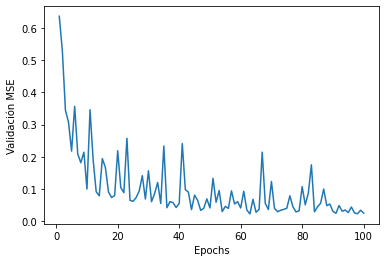

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

Se realiza una gráfica para comparar las pérdidas de entreno y validación

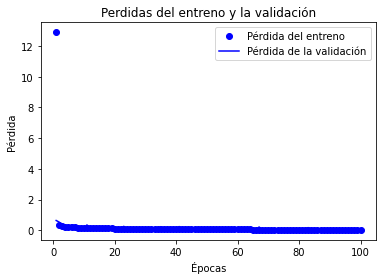

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Se confrontan en una gráfica las épocas contra la métrica de error absoluto medio (MAE)

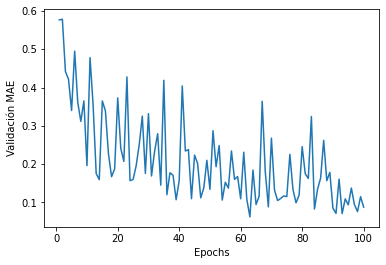

In [25]:
 import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Por último se realiza una gráfica para comparar el mae de entreno y validación

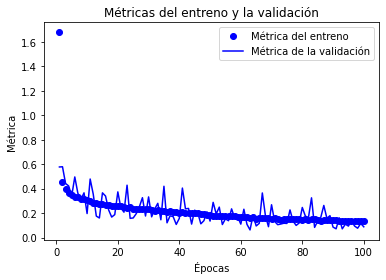

In [26]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Métrica del entreno')
plt.plot(epochs, val_loss, 'b', label='Métrica de la validación')
plt.title('Métricas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Métrica')
plt.legend()

plt.show()

Tras haber obtenido las diversas gráficas correspondientes a la métirca y la validación, se puede observar que a partir de la época 20 se produce sobre entrenamiento. A pesar de que las gráficas no son del todo claras al tener picos, pero este punto es el apropiado para que la red no se sobre entrene es decir, obtenga la mejor predicción posible sin necesidad de un elevado coste computacional.

Para comprobar que esto es correcto se realiza una nueva red con el mismo modelo pero entrenada con tan solo 20 épocas.

In [27]:
mymodel2 = build_model()

In [28]:
history = mymodel2.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 11.6175 - mean_absolute_error: 1.6064 - val_loss: 0.5220 - val_mean_absolute_error: 0.5145
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3864 - mean_absolute_error: 0.4820 - val_loss: 0.3941 - val_mean_absolute_error: 0.4805
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2833 - mean_absolute_error: 0.4064 - val_loss: 0.1860 - val_mean_absolute_error: 0.2961
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2423 - mean_absolute_error: 0.3718 - val_loss: 0.2232 - val_mean_absolute_error: 0.3602
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2220 - mean_absolute_error: 0.3524 - val_loss: 0.1889 - val_mean_absolute_error: 0.3096
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2079 - mean_absolute_error: 0.3463 - val_loss: 0.1705 - val_mean_absolute_error: 0.2795
Epoch 7/20
391/

Se guardan de nuevo tanto la pérdida como la métrica de validación y se realizan las mismas gráficas que se han realizado con el modelo anterior.

In [29]:
mae_history = history.history['val_mean_absolute_error']
mse_history = history.history['val_loss']

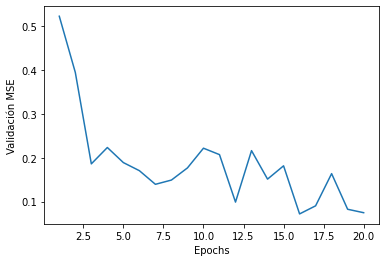

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

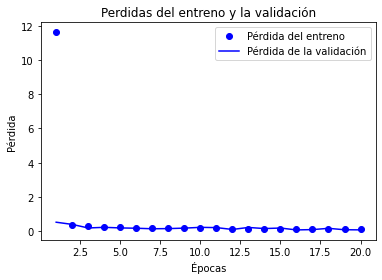

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

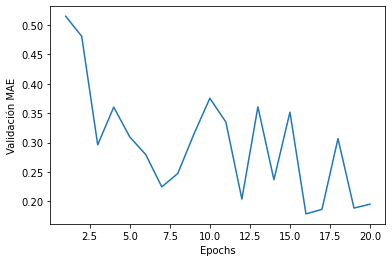

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

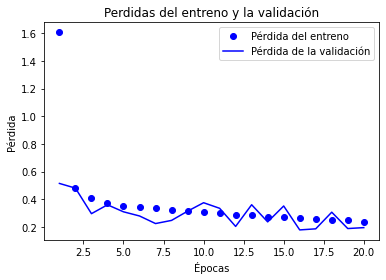

In [33]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Tras haber realizado este nuevo modelo se puede verificar que con 20 épocas no se produce sobre entrenamiento y que los valores de métrica que son aquellos que nos interesan son muy parecidos al terminar la época 20, que los obtenidos al terminar la época 100 en el modelo anterior.
- Val_mean_absolute_error época 100 modelo 1: 0.08
- Val_mean_absolute_error época 20 modelo 2: 0.19

Como vemos la diferencia es casi insignificante

Tras haber analizado el número de épocas correctas y haber concretado el modelo de red óptimo para la resolución de este problema, se ha decidido implementar el método k-folds que permitirá obtener una red con mejores valores de métrica que la obtenida. 

Este método consiste en dividir los datos de entrenamiento en 4 partes iguales durante 4 iteraciones empleando en cada una de las iteraciones distintas 1 parte como datos de validación y el resto como datos de entrenamiento con el fin de garantizar una mayor diviersidad de estos datos.

In [34]:
import numpy as np

k = 4
num_val_samples = len(train_datos) // k 
print("num_val_samples", num_val_samples)
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold #', i)
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=128, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 17500
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 17500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 17500 : 70000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 17500 : 35000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 17500 ]U[ 35000 : 70000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 35000 : 52500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 35000 ]U[ 52500 : 70000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 52500 : 70000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 52500 ]U[ 70000 : 70000 ]


Se muestran los diversos valores de error medio absoluto de validación obtenidos en cada una de las iteraciones

In [35]:
all_scores

[0.4120800197124481,
 0.17208325862884521,
 0.13154372572898865,
 0.12038782238960266]

Se realiza la media de los datos obtenidos en el apartado anterior con el fin de conocer el verdadero error medio absoluto del nuevo modelo en el cual se emplean los k-folds.

In [36]:
np.mean(all_scores)

0.20902370661497116

In [37]:
from keras import backend as K
K.clear_session()

A continuación, se vuelve a realizar el proceso de k-folds con un número de épocas mayor con el fin de ver cual es el número correctas de época de entrenamiento y además en este caso se guardan los valores de mae en cada una de las épocas para poder realizar una gráfica donde poder ver mejor el número de épocas a emplear.

In [38]:
num_epochs = 60
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=128, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 17500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 17500 : 70000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 17500 : 35000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 17500 ]U[ 35000 : 70000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 35000 : 52500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 35000 ]U[ 52500 : 70000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 52500 : 70000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 52500 ]U[ 70000 : 70000 ]


Se hace la media en cada una de las épocas usando los datos de mae de cada una de las 4 iteraciones realizadas durante el proceso de k-folds

In [39]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

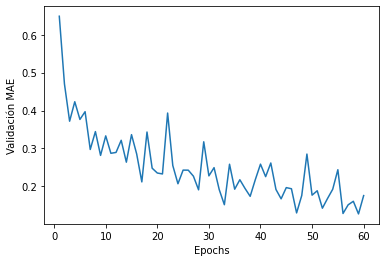

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

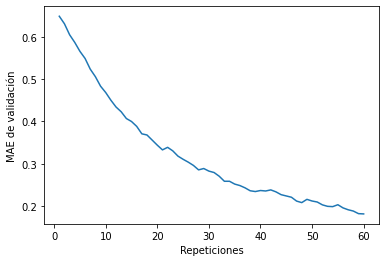

In [45]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[0:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

Observando las dos gráficas obtenidas se puede ver que tal y como se ha dicho en los modelos sin usar k-folds un número correcto de épocas serían 20 ya que a partir de ahí la mejora del modelo es muy leve y supondría un coste computacional adicional innecesario.

Por último se realiza el modelo con los hiperparámetros que se han determinado como óptimos tras haber realizado los diversos estudios, con el fin de evaluar el rendimiento de este modelo sobre los datos de test.

In [46]:
model = build_model()
model.fit(train_datos, train_labels,
          epochs=20, batch_size=128, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_datos, test_labels )

811/811 [==============================] - 1s 2ms/step - loss: 0.0911 - mean_absolute_error: 0.2596


Ya que la métrica de este problema es el error medio absoluto, se muestra cual ha sido este error medio absoluto tras evaluar el modelo con los datos de test.

In [47]:
test_mae_score

0.25956493616104126

# CONCLUSIONES Y TRABAJO A FUTURO

Tras haber realizado los diversos estudios para realizar el modelo correcto para el proyecto que se pretendía resolver, se pueden sacar las siguientes conclusiones:

Al tratarse de un modelo de regresión con tanta cantidad de datos no es necesario realizar un proceso de k-folds ya que no mejora los valores de métrica de validación que se han obtenido en los modelos en los cuales no se usa este método.

Lo más importante en estos modelos de regresión es conocer cual es el número correcto de épocas que se emplean para entrenar el modelo, ya que, en muchas ocasiones el valor de error medio absoluto sigue disminuyendo, pero esa disminución es muy baja por lo cual no compensa entrenar el modelo de más para obtener resultados muy parecidos.

En cuanto a la evaluación propia del tema del proyecto se ha de decir que se han obtenido resultados muy buenos ya que el modelo final realizado tras ser evaluado con los datos de test han dado un error medio absoluto de 0.259.

Esto supone que las predicciones de temperatura que realiza el modelo son bastante exactas ya que los rangos de temepratura entre los cuales se encuentran los datos de este modelo son -21.8 y 39.9 lo que supone un rango de 62 grados centígrados, por tanto, el error medio absoluto corresponde a un 0.05% de ese rango.

En cuanto a trabajo futuro que se podría realizar de este proyecto sería realizar una base de datos con registros pertenecientes a lugares diversos, para ello se debería incorporar una nueva característica a los datos de entrada que sería una especie de localizador que indicara categoricamente a donde pertenece ese registro, lo que nos permitiría en un mismo momento conocer la temperatura de varios lugares.

Otra opción de trabajo a futuro podría ser introducir una característica que fuera la fecha con el fin de poder conseguir la temperatura mínima y máxima en un lugar en un día concreto y no solo la temperatura en ese instante.